In [ ]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from scipy.stats import multivariate_normal
import seaborn as sns


# Temas Selectos de Ciencia de Datos
## Tarea 2
### Diego Ramírez Araque

## Ejercicio 1

En general, la distribución de Wishart no puedes ser visualizada, pero para el caso de $(p-2)$ una opción es tomar números aleatorios de esta distribución y producir con ellos un diagrama de dispersión en tres dimensiones.

Consideremos que la matriz de covarianza poblacional es:
$$
\Sigma =
\begin{pmatrix}
1 & 0.75 \\
0.75 & 1 \\
\end{pmatrix}
$$
Obtener el diagrama de dispersión tridimensional de una simulación de la distribución de Wishar para $m=10$ y $1000$ realizaciones.


```
# Esto tiene formato de código
```



## Solución

La simulación Monte Carlo de para la distribución Wishart se deriva de la simulación de $m$ vectores de dimesnión $p$ con entradas gaussianas estándar $z_{i}$ con $i=1,2,3,...,m$ donde $m$ son los grados de libertad de la distribución $W(m,\Sigma)$. Así $\sum_{i=1}^{m} z_{i}z_{i}' W(m,\Sigma)$. Dependiendo del número de realizaciones $N$, se repite el bloque de instrucciones anterior. El siguiente bloque de código se basa en lo anterior:

In [ ]:
## Simulación Monte Carlo distribución Wishart.
def wishart_sample(sigma,m,N):
  # Dimensión
  p = np.transpose(sigma).shape[0]
  # Auxiliares
  sample_W = []
  # Ciclo for para N realizaciones de la distribución Wishart
  for i in range(0,N):
    sum_W = []
    # Muestra de m vectores de dimensión p tales que ~ N(0,Sigma)
    sample = multivariate_normal.rvs(mean=np.zeros(p), cov=sigma, size = m)
    samplet = np.transpose(sample)
    # Ciclo for para los grados de libertad de la dist. Wishart
    for j in range(0,m):
      z = sample[j].reshape(2,1)
      zt = sample[j].reshape(1,2)
      # Producto matricial de zz'
      zzt = np.matmul(z,zt)
      sum_W.append(zzt)
    # Suma de las m matrices zzt
    suma_W = sum(sum_W)
    # La lista sample_W almacena una muestra de N matrices con dist. Wishart
    sample_W.append(suma_W)
  return sample_W

* Primer caso: 


Definimos $\overline{\mu} = \overline{0}$ el vector de medias cero y $\Sigma$ con $m=10$ grados de libertad y $N = 10000$

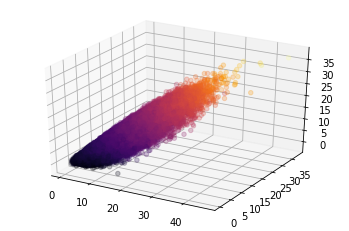

In [ ]:
# Dimensión de vectores
p = 2
# Vector de medias (vector de 0's)
mean = np.zeros(p)
# Matriz de covarianzas Sigma
Sigma = [[1,0.75],[0.75,1]]
N = 100000

# Primera realización
m = 10
sample_A = wishart_sample(Sigma,m,N)

# Gráfico de dispersión
ax = plt.axes(projection='3d')

# Datos para gráfico de dispersión
xdata = [sample_A[k][0,0] for k in range(0,N)]
ydata = [sample_A[k][1,1] for k in range(0,N)]
zdata = [sample_A[k][0,1] for k in range(0,N)]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='inferno',alpha = 0.25);



Es claro que se forma una elipse sobre un plano inclinado gráficando el plano XY con los valores diagonales vs el valor no diagonal.

* Segundo caso:

Definimos $\overline{\mu} = \overline{0}$ el vector de medias cero y $\Sigma$ con $m=1000$ grados de libertad y $N = 10000$

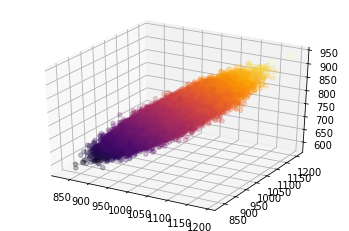

In [ ]:
# Segunda realización
m = 1000
sample_B = wishart_sample(Sigma,m,N)

# Datos para gráfico de dispersión
ax = plt.axes(projection='3d')
# Gráfico de dispersión
xdata = [sample_B[k][0,0] for k in range(0,N)]
ydata = [sample_B[k][1,1] for k in range(0,N)]
zdata = [sample_B[k][0,1] for k in range(0,N)]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='inferno',alpha = 0.25);


Se puede apreciar con mayor claridad el elipse sobre el plano inclinado, este factor de inclinación es determinado por el valor no diagonal.

## Ejercicio 2.

Considere la matriz de datos estandarizada $Z$ con entradas gaussianas, compuesta de $p$ series de tiempo de longitud $n$. La matriz de correlación se define como $C = \frac{1}{n} ZZ'$. Graficar el mapa de calor para los casos $p=40$, $n=10$ y $n=1000$. Calcular la media y desviación estándar de los elementos diagonales y no diagonales por separado.
¿Qué diferencias encuentras en cada caso?

## Solución.

De manera similar que el inciso anterior generamos 

In [ ]:
# Función que genera una matriz Z con entradas gaussianas y genera la matriz C = 1/n ZZ'
def correlation_matrix(n,p):
  sigma = np.identity(p)
  Z = multivariate_normal.rvs(mean=np.zeros(p), cov=sigma, size = n)
  C = 1/n*np.matmul(np.transpose(Z),Z)
  return C

* Primer caso:

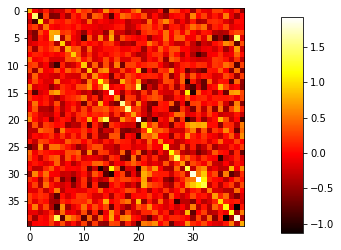

In [ ]:
# Caso n = 10
C_1 = correlation_matrix(10,40)
plt.imshow(C_1, cmap='hot')
cax = plt.axes([0.85, 0.1, 0.050, 0.75])
plt.colorbar(cax=cax)
plt.show()

In [ ]:
# Estadísticos valores diagonales
mu_diag_C1 = np.mean(np.diag(C_1))
sigma_diag_C1 = np.var(np.diag(C_1))
print("Media de valores diagonales: ")
print(mu_diag_C1)
print("Varianza de los valores diagonales: ")
print(sigma_diag_C1)

Media de valores diagonales: 
1.099470442165099
Varianza de los valores diagonales: 
0.1763910702918817


In [ ]:
# Estadísticos valores no diagonales
ndiagonal_C1 = []
for i in range(0,p):
  for j in range(0,p):
    if i != j:
      nd = C_1[i,j]
      ndiagonal_C1.append(nd)
mu_ndiag_C1 = np.mean(ndiagonal_C1)
sigma_ndiag_C1 = np.var(ndiagonal_C1)
print("Media de valores no diagonales: ")
print(mu_ndiag_C1)
print("Varianza de los valores no diagonales: ")
print(sigma_ndiag_C1)

Media de valores no diagonales: 
-0.06537975939444522
Varianza de los valores no diagonales: 
0.0


* Segundo caso:

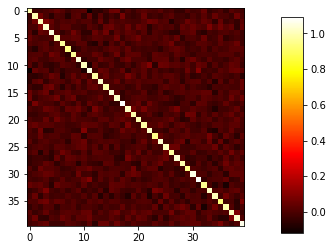

In [ ]:
# Caso n = 1000
C_2 = correlation_matrix(1000,40)
plt.imshow(C_2, cmap='hot')
cax = plt.axes([0.85, 0.1, 0.050, 0.75])
plt.colorbar(cax=cax)
plt.show()

In [ ]:
# Estadísticos valores diagonales
mu_diag_C2 = np.mean(np.diag(C_2))
sigma_diag_C2 = np.var(np.diag(C_2))
print("Media de valores diagonales: ")
print(mu_diag_C1)
print("Varianza de los valores diagonales: ")
print(sigma_diag_C1)

Media de valores diagonales: 
1.099470442165099
Varianza de los valores diagonales: 
0.1763910702918817


In [ ]:
# Estadísticos valores no diagonales
ndiagonal_C2 = []
for i in range(0,p):
  for j in range(0,p):
    if i != j:
      nd = C_2[i,j]
      ndiagonal_C2.append(nd)
mu_ndiag_C2 = np.mean(ndiagonal_C2)
sigma_ndiag_C2 = np.var(ndiagonal_C2)
print("Media de valores no diagonales: ")
print(mu_ndiag_C2)
print("Varianza de los valores no diagonales: ")
print(sigma_ndiag_C2)

Media de valores no diagonales: 
-0.02403390955616992
Varianza de los valores no diagonales: 
0.0


En el caso $n=10$ hay una mayor varianza entre los número fuera de la diagonal y en ambos casos los estadísticos de la diagonal permanecen constantes. Cuando $n=1000$ se aprecia un cambio considerable en la desviación y moda de los elementos diagonales aproximándose ambos a 0.

## Ejercicio 3.

Generar una matriz $Z$ de dimensión $n\times p$ cuyas entradas sean $iid$ N(0,1). Sea $D$ una matriz diagonal $p \times p$ y $X = DZ$. Sea $S = n^{-1} XX'$ la matriz de covarianza muestral de dimesnión $p \times p$. Simular y graficar en orden descendente los eigenvalores de la matriz S para los casos $p = 30$, $n \in \{30,300\}$ y $D^{2} = diag(12,11,10,9,8,7,3,...3)$. ¿Cúantos componentes principales retendría en cada caso?

### Solución

In [ ]:
# Nota:
# K := números distintos de 3
# H := núm. de repeticiones del número 3
p = 30
K = 6
n = 30
H = n-K
# Vector auxiliar que almacena repeticiones del núm. 3
aux = [3]*H
# Definimos matriz D^2
D2_aux = [12,11,10,9,8,7]
D2_list = D2_aux + aux
D = np.diag(np.sqrt(D2_list))
D2 = np.diag(D2_list)
# Vector de media 0 y matriz Sigma igual a la identidad_pxp
mu_Z = np.zeros(p)
Sigma_Z = np.identity(p)
aux_evs = []
for i in range(0,1000):
  Z = multivariate_normal.rvs(mean=mu_Z, cov=Sigma_Z, size = n)
  X = np.matmul(D,Z)
  S = (1/n)*np.matmul(np.transpose(X),X)
  evs = list(np.linalg.eigvals(S))
  aux_evs = aux_evs + evs
c = p/n
lambda_max = pow(1+np.sqrt(c),2)
lambda_min = pow(1-np.sqrt(c),2)
lam = np.histogram(aux_evs, bins=65)[1]
rho = np.sqrt((lambda_max-lam)*(lam-lambda_min))/(2*np.pi*c*lam)
plt.hist(aux_evs, density=True, bins=65, align='mid', rwidth=0.8)
plt.plot(lam,rho)
plt.ylabel('Densidad')
plt.xlabel('Datos');

La línea amarrilla en la gráfica anteriror representa la aproximación analítica de la distribución de Marckenko-Pasteur y los rectangulos azules la distribución empírica de los eigenvalores muestreados.  De acuerdo a la Ley de Marchenko Pasteur, basta tomar valores mayores a $\lambda_{max}$ que en este caso puede

> Bloc con sangría



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


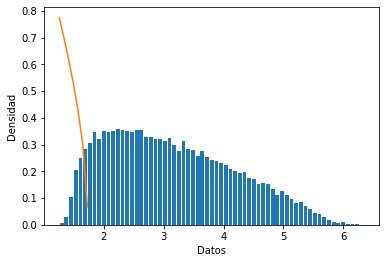

In [44]:
# Nota:
# K := números distintos de 3
# H := núm. de repeticiones del número 3
p = 30
K = 6
n = 300
H = n-K
# Vector auxiliar que almacena repeticiones del núm. 3
aux = [3]*H
# Definimos matriz D^2
D2_aux = [12,11,10,9,8,7]
D2_list = D2_aux + aux
D = np.diag(np.sqrt(D2_list))
D2 = np.diag(D2_list)
# Vector de media 0 y matriz Sigma igual a la identidad_pxp
mu_Z = np.zeros(p)
Sigma_Z = np.identity(p)
aux_evs = []
for i in range(0,1000):
  Z = multivariate_normal.rvs(mean=mu_Z, cov=Sigma_Z, size = n)
  X = np.matmul(D,Z)
  S = (1/n)*np.matmul(np.transpose(X),X)
  evs = list(np.linalg.eigvals(S))
  aux_evs = aux_evs + evs
c = p/n
lambda_max = pow(1+np.sqrt(c),2)
lambda_min = pow(1-np.sqrt(c),2)
lam = np.histogram(aux_evs, bins=65)[1]
rho = np.sqrt((lambda_max-lam)*(lam-lambda_min))/(2*np.pi*c*lam)
plt.hist(aux_evs, density=True, bins=65, align='mid', rwidth=0.8)
plt.plot(lam,rho)
plt.ylabel('Densidad')
plt.xlabel('Datos');

La línea amarrilla en la gráfica anteriror representa la aproximación analítica de la distribución de Marckenko-Pasteur y los rectangulos azules la distribución empírica de los eigenvalores muestreados.  De acuerdo a la Ley de Marchenko Pasteur, basta tomar valores mayores a $\lambda_{max}$ que en este caso pueden ser mayor a 6.


# Ejercicio 4
Generar $m=100000$ matrices para las dimensiones $p \in \{10,100,1000\}$ y producir los histogramas normalizados, se deben escalar por el factor $\frac{1}{\sqrt{\beta_{p}}}$, donde $\beta = 1,2,4$ para el caso $GOE,GUE$ y $GSE$ respectivamente. Comparar los resultados teóricos $\rho(x) = \frac{1}{\pi}\sqrt{2-x^{2}}$, llamada ley del semicírculo de Wigner. Se tienen los siguientes resultados analíticos para las cotas del soporte de las distribuciones que generará:
* $\pm \sqrt{2p} \quad \text{GOE}$
* $\pm \sqrt{4p} \quad \text{GUE}$
* $\pm \sqrt{8p} \quad \text{GSE}$ \\
¿Cómo se calcula análiticamente la forma de estos histogramas?¿Qué sucede al aumentar el valor de $p$?


* Solución

In [47]:
p = 10
m = 1000
# Vector de media 0 y matriz Sigma igual a la identidad_pxp
mu_Z = np.zeros(p)
Sigma_Z = np.identity(p)

In [48]:
def GOE(H):
  Hs = (H + np.transpose(H))/2
  evs_Hs = np.linalg.eigvals(Hs)
  return evs_Hs

def GUE(H):
  Hh = (H + H.getH())/2
  evs_Hh = np.linalg.eigvals(Hh)
  return evs_Hh.real

def GSE(H):
  Hs = np.transpose(H)
  Hs = H.conj()
  H_selfDual = (H + Hs)/2
  evs_Hsd = np.linalg.eigvals(H_selfDual)
  return evs_Hsd.real

In [49]:
def evs_list(data):
  lista_aux = []
  n = len(data)
  for i in range(0,n):
    lista_aux = lista_aux + list(data[i])
  return lista_aux

In [ ]:
def gaussian_real_matrix(N):
  matrix_aux = np.zeros((N,N))
  for i in range(0,N):
    for j in range(0,N):
      a = float(multivariate_normal.rvs( mean=0, cov=1, size = 1))
      matrix_aux[i,j] = np.sqrt(1/N)*a
  return np.array(matrix_aux)

def gaussian_complex_matrix(N):
  matrix_aux = np.zeros((N,N),dtype=complex)
  for i in range(0,N):
    for j in range(0,N):
      a = np.sqrt(1/(2*N))*float(multivariate_normal.rvs( mean=0, cov=1, size = 1))
      b = np.sqrt(1/(2*N))*float(multivariate_normal.rvs( mean=0, cov=1, size = 1))
      matrix_aux[i,j] = complex(a,b)
  return np.matrix(matrix_aux)

def gaussian_quaternions_matrix(N):
  aux1 = []
  aux2 = []
  for i in range(0,N):
    complexes_A = np.array([complex(0,0) for i in range(N)],dtype=complex)
    complexes_B = np.array([complex(0,0) for i in range(N)],dtype=complex)
    complexes_A.real = multivariate_normal.rvs( mean=0, cov=1, size = N)
    complexes_A.imag = multivariate_normal.rvs( mean=0, cov=1, size = N)
    complexes_B.real = multivariate_normal.rvs( mean=0, cov=1, size = N)
    complexes_B.imag = multivariate_normal.rvs( mean=0, cov=1, size = N)
    complexes_A = np.sqrt(1/(4*N))*complexes_A.reshape(N,1)
    complexes_B = np.sqrt(1/(4*N))*complexes_B.reshape(N,1)
    aux1.append(complexes_A)
    aux2.append(complexes_B)
  X = np.block([x for x in aux1])
  Y = np.block([x for x in aux2])
  X_star = np.conj(X)
  Y_star = np.conj(Y)
  R1 = np.block([X,Y])
  R2 = np.block([-Y_star,X_star])
  return np.array(np.block([[R1],[R2]]))

In [ ]:
print('GOE :',GSE(gaussian_quaternions_matrix(3)))
print('GUE :',GSE(gaussian_quaternions_matrix(3)))
print('GSE :',GSE(gaussian_quaternions_matrix(3)))

GOE : [ 0.50599033  0.50599033 -0.28572005 -0.28572005  0.25663063  0.25663063]
GUE : [-0.46332742 -0.46332742  0.25816471  0.25816471  0.46144268  0.46144268]
GSE : [-0.36760559 -0.36760559  0.75656396  0.75656396  0.38259748  0.38259748]


* Caso p = 10

In [28]:
GOE_sample = []
GUE_sample = []
GSE_sample = []
for i in range(0,m):
  gaussian_rm = gaussian_real_matrix(p)
  gaussian_cm = gaussian_complex_matrix(p)
  gaussian_qm = gaussian_quaternions_matrix(p)
  GOE_aux = GOE(gaussian_rm)
  GUE_aux = GUE(gaussian_cm)
  GSE_aux = GSE(gaussian_qm)
  GOE_sample = GOE_sample + list(GOE_aux)
  GUE_sample = GUE_sample + list(GUE_aux)
  GSE_sample = GSE_sample + list(GSE_aux)

KeyboardInterrupt: ignored

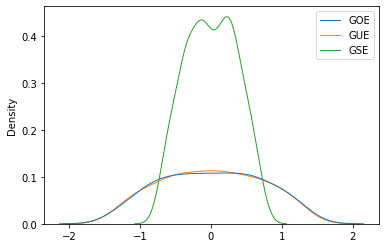

In [27]:
ensambles = {'GOE':np.array(GOE_sample),'GUE':np.array(GUE_sample),'GSE':np.array(GSE_sample)}
plot_p10 = sns.kdeplot(data=ensambles, alpha=.35, linewidth=1)
line = plot_p10.lines[0]
support = line.get_data()

* Caso p = 100

In [51]:
p = 100
GOE_sample_2 = []
GUE_sample_2 = []
GSE_sample_2 = []
for i in range(0,m):
  gaussian_rm_2 = gaussian_real_matrix(p)
  gaussian_cm_2 = gaussian_complex_matrix(p)
  gaussian_qm_2 = gaussian_quaternions_matrix(p)
  GOE_aux_2 = GOE(gaussian_rm_2)
  GUE_aux_2 = GUE(gaussian_cm_2)
  GSE_aux_2 = GSE(gaussian_qm_2)
  GOE_sample_2 = GOE_sample_2 + list(GOE_aux_2)
  GUE_sample_2 = GUE_sample_2 + list(GUE_aux_2)
  GSE_sample_2 = GSE_sample_2 + list(GSE_aux_2)

KeyboardInterrupt: ignored

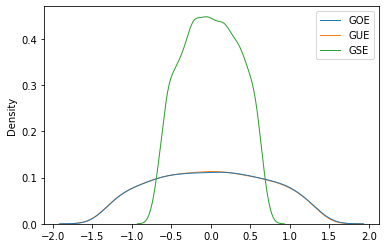

In [52]:
ensambles = {'GOE':np.array(GOE_sample_2),'GUE':np.array(GUE_sample_2),'GSE':np.array(GSE_sample_2)}
sns.kdeplot(data=ensambles, alpha=.35, linewidth=1)

* Caso p = 1000

In [ ]:
p = 1000
GOE_sample_3 = []
GUE_sample_3 = []
GSE_sample_3 = []
for i in range(0,500):
  gaussian_rm_3 = gaussian_real_matrix(p)
  gaussian_cm_3 = gaussian_complex_matrix(p)
  gaussian_qm_3 = gaussian_quaternions_matrix(p)
  GOE_aux_3 = GOE(gaussian_rm_3)
  GUE_aux_3 = GUE(gaussian_cm_3)
  GSE_aux_3 = GSE(gaussian_qm_3)
  GOE_sample_3 = GOE_sample_3 + list(GOE_aux_3)
  GUE_sample_3 = GUE_sample_3 + list(GUE_aux_3)
  GSE_sample_3 = GSE_sample_3 + list(GSE_aux_3)

KeyboardInterrupt: ignored

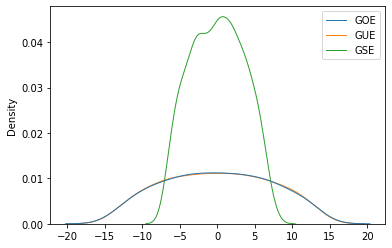

In [ ]:
ensambles = {'GOE':np.array(GOE_sample_3)*(1/mth.sqrt(1)),'GUE':np.array(GUE_sample_3)*(1/mth.sqrt(2)),'GSE':np.array(GSE_sample_3)*(1/mth.sqrt(4))}
sns.kdeplot(data=ensambles, alpha=.35, linewidth=1)